<a href="https://colab.research.google.com/github/seunghee0518/python_colab/blob/main/tensorflow_transfer_learning%5Bdata_kaggle_cat%26dog%2C_ResNet50%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# feature extractor
kaggle_cat and dog data & ResNet50




In [1]:
#import library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Download ResNet50
model = ResNet50(include_top = True,
                 weights = "imagenet",
                 input_tensor = None,
                 input_shape = None,
                 pooling = None,
                 classes = 1000)

102973440/102967424 [==============================] - 1s 0us/step


In [3]:
#ResNet50 구조 확인
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [4]:
#Add Dense layer
model.trainable = False
model = Sequential([model,
                    Dense(2, activation = 'sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense (Dense)                (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [5]:
#compile
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [6]:
#구글 드라이브로 데이터 가져오기
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
#데이터 가져오기
#train_dir = "/content/drive/MyDrive/Colab Notebooks/실습파일/catanddog.zip"
#!unzip catanddog.zip

In [8]:
#데이터 가져오기
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "/content/drive/MyDrive/Colab Notebooks/실습파일/catanddog/train"
valid_dir = "/content/drive/MyDrive/Colab Notebooks/실습파일/catanddog/validation"

In [9]:
#model
train = ImageDataGenerator(rescale = 1. /255,
                           rotation_range = 10,
                           width_shift_range = 0.1,
                           height_shift_range = 0.1,
                           shear_range = 0.1,
                           zoom_range = 0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size = (image_height, image_width),
                                            color_mode = 'rgb',
                                            batch_size = BATCH_SIZE,
                                            seed = 1,
                                            shuffle = True,
                                            class_mode = "categorical")

valid = ImageDataGenerator(rescale = 1.0 / 255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size = (224, 224),#input shape 오류로 target size 변경함
                                            color_mode = 'rgb',
                                            batch_size = BATCH_SIZE,
                                            seed = 7,
                                            shuffle = True,
                                            class_mode = 'categorical')

history = model.fit(train_generator,
                    epochs = 10,
                    validation_data = valid_generator,
                    verbose = 2)


Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 114s - loss: 0.6934 - accuracy: 0.4390 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
13/13 - 28s - loss: 0.6933 - accuracy: 0.4831 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
13/13 - 28s - loss: 0.6933 - accuracy: 0.4727 - val_loss: 0.6931 - val_accuracy: 0.5204
Epoch 4/10
13/13 - 28s - loss: 0.6933 - accuracy: 0.4727 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
13/13 - 28s - loss: 0.6930 - accuracy: 0.5169 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
13/13 - 28s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
13/13 - 28s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
13/13 - 28s - loss: 0.6927 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 9/10
13/13 - 28s - loss: 0.6926 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/10
13/13 - 28s - l

<Figure size 432x288 with 0 Axes>

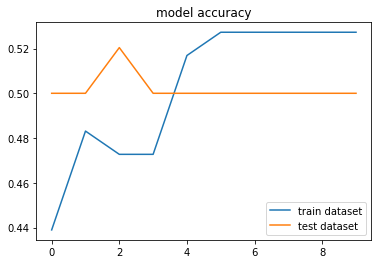

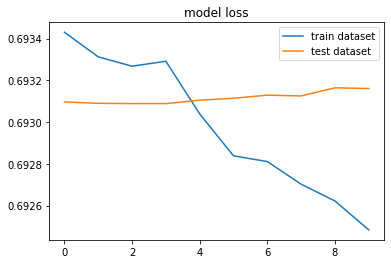

<Figure size 432x288 with 0 Axes>

In [10]:
#Accuracy visualization
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label = 'train dataset')
plt.plot(epochs, val_accuracy, label = 'test dataset')
plt.legend()
plt.title('model accuracy')
plt.figure()

plt.plot(epochs, loss, label = 'train dataset')
plt.plot(epochs, val_loss, label = 'test dataset')
plt.legend()
plt.title('model loss')
plt.figure()


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


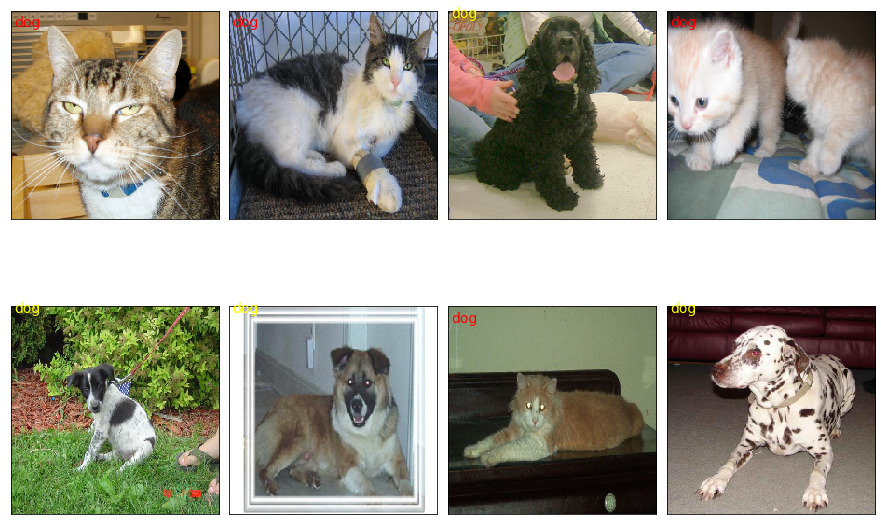

In [11]:
#prediction
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict_classes(validation)

fig = plt.figure(figsize = (12, 8))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

for i in range(8) : 
  ax = fig.add_subplot(2, 4, i+1, xticks = [], yticks = [])
  ax.imshow(validation[i,:], cmap = plt.cm.gray_r, interpolation = 'nearest')
  if prediction_values[i] == np.argmax(label_batch[i]):
    ax.text(3, 7, class_names[prediction_values[i]], color = 'yellow', fontsize = 14)
  else : ax.text(3, 17, class_names[prediction_values[i]], color = 'red', fontsize = 14)

# with Tensorflow Hub
* 라이브러리 설치 필요(코랩에서는 생략)
* pip install tensorflow_hub

In [12]:
#library & ResNet50
import tensorflow_hub as hub
model_2 = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                                              input_shape = (224, 224, 3),
                                              trainable = False),
                               tf.keras.layers.Dense(2, activation = 'softmax')#완전연결층 추가
])


In [14]:
#데이터 확장
train_2 = train
train_generator_2 = train_generator
valid_2 = valid
valid_generator_2 = valid.flow_from_directory(valid_dir,
                                              target_size = (image_height, image_width),
                                              color_mode = "rgb",
                                              batch_size = BATCH_SIZE,
                                              seed = 7,
                                              shuffle = True,
                                              class_mode = "categorical")

Found 98 images belonging to 2 classes.


In [15]:
# model training
history_2 = model.fit(train_generator_2,
                      epochs = 10,
                      validation_data = valid_generator_2,
                      verbose = 2)

Epoch 1/10
13/13 - 19s - loss: 0.6925 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
13/13 - 18s - loss: 0.6924 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
13/13 - 18s - loss: 0.6923 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
13/13 - 18s - loss: 0.6923 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
13/13 - 18s - loss: 0.6923 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/10
13/13 - 18s - loss: 0.6922 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/10
13/13 - 18s - loss: 0.6921 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/10
13/13 - 18s - loss: 0.6920 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 9/10
13/13 - 18s - loss: 0.6920 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 10/10
13/13 - 18s - loss: 0.6920 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000


<Figure size 432x288 with 0 Axes>

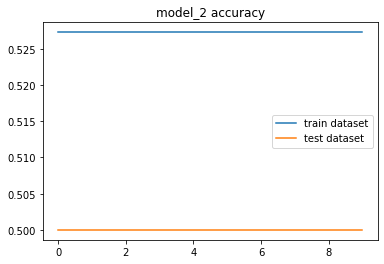

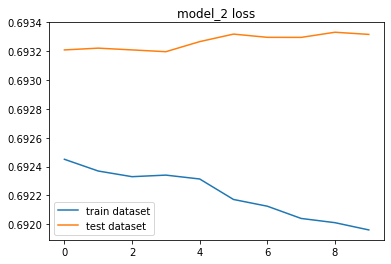

<Figure size 432x288 with 0 Axes>

In [16]:
#Accuracy visualization
accuracy_2 = history_2.history['accuracy']
val_accuracy_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_2 = range(len(accuracy_2))

plt.plot(epochs_2, accuracy_2, label = 'train dataset')
plt.plot(epochs_2, val_accuracy_2, label = 'test dataset')
plt.legend()
plt.title('model_2 accuracy')
plt.figure()

plt.plot(epochs_2, loss_2, label = 'train dataset')
plt.plot(epochs_2, val_loss_2, label = 'test dataset')
plt.legend()
plt.title('model_2 loss')
plt.figure()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


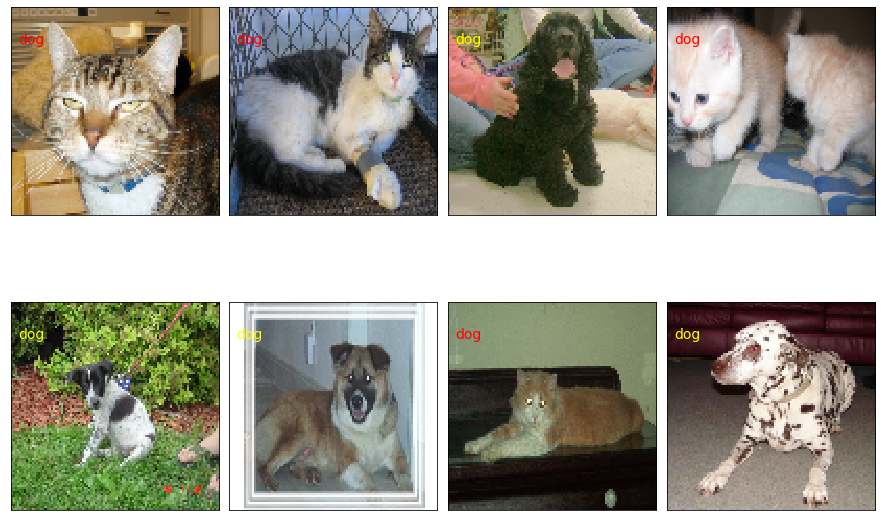

In [20]:
#prediction
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator_2))
prediction_values = model.predict_classes(validation)

fig = plt.figure(figsize = (12, 8))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

for i in range(8):
  ax = fig.add_subplot(2, 4, i+1, xticks = [], yticks = [])
  ax.imshow(validation[i, :], cmap = plt.cm.gray_r, interpolation = 'nearest')
  if prediction_values[i] == np.argmax(label_batch[i]):
    ax.text(3, 17, class_names[prediction_values[i]], color = 'yellow', fontsize = 14)
  else:
    ax.text(3, 17, class_names[prediction_values[i]], color = 'red', fontsize = 14)

* 통상적으로 텐서플로 허브를 사용할 때 예측력이 더 좋음


# fine-tuning, 미세조정기법
